# World happiness report

This is the group project of Florian Pätzold, Pelin Kömürlüoglu, Saskia Nehls and Merlin Marinova for the course Action & Cognition: Computational Cognition. We here analyse and visualise aspects of the happiness world report from 2015 to 2022.  
We chose this dataset as it contains a lot of data from 2015 until 2022 covering iteresting aspects about the subjective feeling of happiness of all countries' population.  
We will here first clean and wrangle the data to further investigate and visualize certain aspects to come up with research questions. We will then analyse the data with regards to these questions:

1. Case studies: Which neighbouring countries show large discrepancies and what might be the reason?
2. Which countries had jumps in happiness scores in the period of pre-covid and covid in the world?
3. How did the priorities affecting the happiness scores of the countries change over time?
4. How much does the happiness vary within a population in the happiest countries vs the unhappiest countries?

Countributions: 
- Florian Pätzold: Pre-processing, visualizations and statistical analyses for research quesitons 1 & 2, and merging of notebooks.
- Pelin Kömürlüoğlu: Visualizations, statistical analyses, and interpretations for research question 3 & 4.
- Saskia Nehls: Additional pre-processing for the research questions 3 & 4, visualizations, statistical analyses, and interpretations for research question 4. 
- Merlin Marinova: Pre-processing, visualizations, statistical analyses, and interpretations for research questions 1 & 2.

## Table of contents

* [Helper functions](#0)
* [1 Data pre-processing](#1)
    * [1.1 Load and investigate the data](#1.1)
    * [1.2 Concatenate the data](#1.2)
* [2 Data exploration & analysis](#2)
    * [2.1 Research question 1](#2.1)
    * [2.2 Research question 2](#2.2)
    * [2.3 Research question 3](#2.3)
    * [2.4 Research question 4](#2.4)

## Helper functions <a class="anchor" id="0"></a>

For pre-processing the data, we here define helper functions.

In [1]:
def find_country_mismatch(data1, data2):
    """
    Find mismatching countries in two data columns.
    
    Args:
    data1 - dataset containing 'Country' column
    data2 - another dataset cointaining 'Country' column
    """
    country_one = list(data1.copy()["Country"].unique())
    country_two = list(data2.copy()["Country"].unique())
    mismatch = list(country_one)

    for x in country_one:
        for y in country_two:
            if x == y:
                mismatch.remove(x)
                
    return mismatch

In [2]:
def is_zero(country, year, column):
    """
    Checks if value in column is zero for a country in a year.

    Args:
    country (str)
    year (int)
    column (str)

    Returns:
    bool
    """

    # does country exist in df
    country_check = happiness.loc[(happiness['Country'].str.contains(country, case=False))]
    # does year exist in country df
    year_check = country_check.loc[country_check['Year'].str.contains(str(year), case=False)]
    # is there a 0
    col_check = year_check.loc[year_check[column] == 0.000000]

    if (country_check.empty) or (year_check.empty) or (col_check.empty):
        return False
    else:
        return True

## 1 Data pre-processing <a class="anchor" id="1"></a>

### 1.1 Load and investigate the data <a class="anchor" id="1.1"></a>

Import all necessary packages for the project.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression

# this is only necessary if the packages are not yet installed in your environment
# a repository would fix this problem

# get plotly
try:
    import plotly.express as px
except Exception:
    !pip install plotly
    import plotly.express as px

# get geopandas
try:
    import geopandas as gpd
except Exception:
    !pip install geopandas
    import geopandas as gpd
    
# get seaborn
try:
    import seaborn as sns
except Exception:
    !pip install seaborn
    import seaborn as sns
    
# get sklearn
try:
    import sklearn
except Exception:
    !pip install sklearn
    import sklearn

# get statsmodels
try:
    import statsmodels.api as sm
except Exception:
    !pip install statsmodels
    import statsmodels.api as sm

Now we load in the happiness data for 2015 to 2022 from kaggle and have a first look at it.

In [4]:
# change to local file path if necessary
happiness_2015 = pd.read_csv("data/happiness_2015.csv")
happiness_2016 = pd.read_csv("data/happiness_2016.csv")
happiness_2017 = pd.read_csv("data/happiness_2017.csv")
happiness_2018 = pd.read_csv("data/happiness_2018.csv")
happiness_2019 = pd.read_csv("data/happiness_2019.csv")
happiness_2020 = pd.read_csv("data/happiness_2020.csv")
happiness_2021 = pd.read_csv("data/happiness_2021.csv")
happiness_2022 = pd.read_csv("data/happiness_2022.csv", decimal=',')

In [5]:
# show first ten rows
happiness_2022.head(10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483


### 1.2 Concatenate the data <a class="anchor" id="1.2"></a>

We further want to concatenate all datasets and add a column specifying the year of the report. We do that to later visualize the happiness scores in an interactive heatmap with the plotly package (see 4).

In [6]:
# have a look at the current column names for each dataset
print("2015:", list(happiness_2015.columns), "\n") # 12
print("2016:", list(happiness_2016.columns), "\n") # 13
print("2017:", list(happiness_2017.columns), "\n") # 12
print("2018:", list(happiness_2018.columns), "\n") # 9
print("2019:", list(happiness_2019.columns), "\n") # 9
print("2020:", list(happiness_2020.columns), "\n") # 20
print("2021:", list(happiness_2021.columns), "\n") # 20
print("2022:", list(happiness_2022.columns), "\n")

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 

2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 

2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'So

As we can see, the datasets have different (amounts of) columns for the different years. So first of all, we change the column names of each dataset such that they are the same and initialize new empty missing columns.

In [7]:
# select necessary columns in each dataset
happiness_2015 = happiness_2015[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
happiness_2016 = happiness_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                                 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
happiness_2017 = happiness_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 
                                 'Trust..Government.Corruption.', 'Dystopia.Residual']]
happiness_2018 = happiness_2018[['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
                                 'Generosity', 'Perceptions of corruption']]
happiness_2019 = happiness_2019[['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
                                 'Generosity', 'Perceptions of corruption']]
happiness_2020 = happiness_2020[['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'Explained by: Log GDP per capita', 
                                 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                                 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']]
happiness_2021 = happiness_2021[['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'Explained by: Log GDP per capita', 
                                 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 
                                 'Explained by: Perceptions of corruption', 'Dystopia + residual']]
happiness_2022 = happiness_2022[['RANK', 'Country', 'Happiness score', 'Dystopia (1.83) + residual', 'Explained by: GDP per capita', 'Explained by: Social support', 
                                 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 
                                 'Explained by: Perceptions of corruption']]

# Transform all datasets to match for concatenation
# We want columns: year, country, region, rank, score, std error, gdp, family, social support, healthy life exp, freedom, generosity, trust, dystopia res
happiness_2015['Year'] = ['2015'] * len(happiness_2015)
happiness_2015.rename(columns = {'Happiness Rank':'Rank',
                                 'Happiness Score':'Score',
                                 'Economy (GDP per Capita)':'GDP',
                                 'Health (Life Expectancy)':'Health',
                                 'Trust (Government Corruption)':'Trust'}, inplace=True)

happiness_2016['Year'] = ['2016'] * len(happiness_2016)
happiness_2016['Standard Error'] = np.nan * len(happiness_2016)
happiness_2016.rename(columns = {'Happiness Rank':'Rank',
                                 'Happiness Score':'Score',
                                 'Economy (GDP per Capita)':'GDP',
                                 'Health (Life Expectancy)':'Health',
                                 'Trust (Government Corruption)':'Trust'}, inplace=True)

happiness_2017['Year'] = ['2017'] * len(happiness_2017)
happiness_2017['Region'] = np.nan * len(happiness_2017)
happiness_2017['Standard Error'] = np.nan * len(happiness_2017)
happiness_2017.rename(columns = {'Happiness.Rank':'Rank',
                                 'Happiness.Score':'Score',
                                 'Economy..GDP.per.Capita.':'GDP',
                                 'Health..Life.Expectancy.':'Health',
                                 'Trust..Government.Corruption.':'Trust',
                                 'Dystopia.Residual':'Dystopia Residual'}, inplace=True)

happiness_2018['Year'] = ['2018'] * len(happiness_2018)
happiness_2018['Region'] = np.nan * len(happiness_2018)
happiness_2018['Standard Error'] = np.nan * len(happiness_2018)
happiness_2018['Dystopia Residual'] = np.nan * len(happiness_2018)
happiness_2018.rename(columns = {'Overall rank':'Rank',
                                 'Country or region':'Country',
                                 'GDP per capita':'GDP',
                                 'Healthy life expectancy':'Health',
                                 'Freedom to make life choices':'Freedom',
                                 'Perceptions of corruption':'Trust',
                                 'Social support':'Family'}, inplace=True)

happiness_2019['Year'] = ['2019'] * len(happiness_2019)
happiness_2019['Region'] = np.nan * len(happiness_2019)
happiness_2019['Standard Error'] = np.nan * len(happiness_2019)
happiness_2019['Dystopia Residual'] = np.nan * len(happiness_2019)
happiness_2019.rename(columns = {'Overall rank':'Rank',
                                 'Country or region':'Country',
                                 'GDP per capita':'GDP',
                                 'Healthy life expectancy':'Health',
                                 'Freedom to make life choices':'Freedom',
                                 'Perceptions of corruption':'Trust',
                                 'Social support':'Family'}, inplace=True)

happiness_2020['Year'] = ['2020'] * len(happiness_2020)
happiness_2020['Rank'] = range(1, len(happiness_2020) + 1)
happiness_2020.rename(columns = {'Regional indicator':'Region',
                                 'Country name':'Country',
                                 'Ladder score':'Score',
                                 'Standard error of ladder score':'Standard Error',
                                 'Explained by: Healthy life expectancy':'Health',
                                 'Explained by: Generosity':'Generosity',
                                 'Explained by: Freedom to make life choices':'Freedom',
                                 'Explained by: Perceptions of corruption':'Trust',
                                 'Dystopia + residual':'Dystopia Residual',
                                 'Explained by: Social support':'Family',
                                 'Explained by: Log GDP per capita':'GDP'}, inplace=True)

happiness_2021['Year'] = ['2021'] * len(happiness_2021)
happiness_2021['Rank'] = range(1, len(happiness_2021) + 1)
happiness_2021.rename(columns = {'Regional indicator':'Region',
                                 'Country name':'Country',
                                 'Ladder score':'Score',
                                 'Standard error of ladder score':'Standard Error',
                                 'Explained by: Generosity':'Generosity',
                                 'Explained by: Healthy life expectancy':'Health',
                                 'Explained by: Freedom to make life choices':'Freedom',
                                 'Explained by: Perceptions of corruption':'Trust',
                                 'Dystopia + residual':'Dystopia Residual',
                                 'Explained by: Social support':'Family',
                                 'Explained by: Log GDP per capita':'GDP'}, inplace=True)

happiness_2022['Year'] = ['2022'] * len(happiness_2022)
happiness_2022['Region'] = np.nan * len(happiness_2022)
happiness_2022['Standard Error'] = np.nan * len(happiness_2022)
happiness_2022.rename(columns = {'RANK':'Rank', 
                                 'Happiness score':'Score', 
                                 'Dystopia (1.83) + residual':'Dystopia Residual', 
                                 'Explained by: GDP per capita':'GDP', 
                                 'Explained by: Social support':'Family', 
                                 'Explained by: Healthy life expectancy':'Health', 
                                 'Explained by: Freedom to make life choices':'Freedom', 
                                 'Explained by: Generosity':'Generosity', 
                                 'Explained by: Perceptions of corruption':'Trust'}, inplace=True)

<ipython-input-7-dc958acc6c46>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_2016['Year'] = ['2016'] * len(happiness_2016)
<ipython-input-7-dc958acc6c46>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_2017['Year'] = ['2017'] * len(happiness_2017)
<ipython-input-7-dc958acc6c46>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

We will now look at the mismatches between the country names in the happiness datasets and the world map data from plotly and rename the necessary countries.

In [8]:
# Happiness 2015 --> world
#print("In happiness 2015 but not in world: \n", find_country_mismatch(happiness_2015, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2015), "\n")

happiness_2015.loc[list(happiness_2015['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2015.loc[list(happiness_2015['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2015.loc[list(happiness_2015['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2015.loc[list(happiness_2015['Country']).index('Hong Kong'),'Country'] = "Hong Kong, China"
happiness_2015.loc[list(happiness_2015['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2015.loc[list(happiness_2015['Country']).index('Somaliland region'),'Country'] = "Somalia"
happiness_2015.loc[list(happiness_2015['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2015.loc[list(happiness_2015['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2016 --> world
#print("In happiness 2016 but not in world: \n", find_country_mismatch(happiness_2016, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2016), "\n")

happiness_2016.loc[list(happiness_2016['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2016.loc[list(happiness_2016['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2016.loc[list(happiness_2016['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2016.loc[list(happiness_2016['Country']).index('Hong Kong'),'Country'] = "Hong Kong, China"
happiness_2016.loc[list(happiness_2016['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2016.loc[list(happiness_2016['Country']).index('Somaliland Region'),'Country'] = "Somalia"
happiness_2016.loc[list(happiness_2016['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2016.loc[list(happiness_2016['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2017 --> world
#print("In happiness 2017 but not in world: \n", find_country_mismatch(happiness_2017, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2017), "\n")

happiness_2017.loc[list(happiness_2017['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2017.loc[list(happiness_2017['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2017.loc[list(happiness_2017['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2017.loc[list(happiness_2017['Country']).index('Hong Kong S.A.R., China'),'Country'] = "Hong Kong, China"
happiness_2017.loc[list(happiness_2017['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2017.loc[list(happiness_2017['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2017.loc[list(happiness_2017['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2018 --> world
#print("In happiness 2018 but not in world: \n", find_country_mismatch(happiness_2018, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2018), "\n")

happiness_2018.loc[list(happiness_2018['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2018.loc[list(happiness_2018['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2018.loc[list(happiness_2018['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2018.loc[list(happiness_2018['Country']).index('Hong Kong'),'Country'] = "Hong Kong, China"
happiness_2018.loc[list(happiness_2018['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2018.loc[list(happiness_2018['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2018.loc[list(happiness_2018['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2019 --> world
#print("In happiness 2019 but not in world: \n", find_country_mismatch(happiness_2019, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2019), "\n")

happiness_2019.loc[list(happiness_2019['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2019.loc[list(happiness_2019['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2019.loc[list(happiness_2019['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2019.loc[list(happiness_2019['Country']).index('Hong Kong'),'Country'] = "Hong Kong, China"
happiness_2019.loc[list(happiness_2019['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2019.loc[list(happiness_2019['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2019.loc[list(happiness_2019['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2020 --> world
#print("In happiness 2020 but not in world: \n", find_country_mismatch(happiness_2020, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2020), "\n")

happiness_2020.loc[list(happiness_2020['Country']).index('Congo (Kinshasa)'),'Country'] = "Congo, Dem. Rep."
happiness_2020.loc[list(happiness_2020['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2020.loc[list(happiness_2020['Country']).index('Ivory Coast'),'Country'] = "Cote d'Ivoire"
happiness_2020.loc[list(happiness_2020['Country']).index('Hong Kong S.A.R. of China'),'Country'] = "Hong Kong, China"
happiness_2020.loc[list(happiness_2020['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2020.loc[list(happiness_2020['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2020.loc[list(happiness_2020['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2021 --> world
#print("In happiness 2021 but not in world: \n", find_country_mismatch(happiness_2021, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2021), "\n")

happiness_2021.loc[list(happiness_2021['Country']).index('Congo (Brazzaville)'),'Country'] = "Congo, Rep."
happiness_2021.loc[list(happiness_2021['Country']).index('Hong Kong S.A.R. of China'),'Country'] = "Hong Kong, China"
happiness_2021.loc[list(happiness_2021['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2021.loc[list(happiness_2021['Country']).index('Palestinian Territories'),'Country'] = "West Bank and Gaza"
happiness_2021.loc[list(happiness_2021['Country']).index('Yemen'),'Country'] = "Yemen, Rep."

# Happiness 2022 --> world
#print("In happiness 2022 but not in world: \n", find_country_mismatch(happiness_2022, world_gapminder), \
#      "\n In world but not in happiness: \n", find_country_mismatch(world_gapminder, happiness_2022), "\n")

happiness_2022.loc[list(happiness_2022['Country']).index('Congo'),'Country'] = "Congo, Rep."
happiness_2022.loc[list(happiness_2022['Country']).index('Hong Kong S.A.R. of China'),'Country'] = "Hong Kong, China"
happiness_2022.loc[list(happiness_2022['Country']).index('Slovakia'),'Country'] = "Slovak Republic"
happiness_2022.loc[list(happiness_2022['Country']).index('Palestinian Territories*'),'Country'] = "West Bank and Gaza"
happiness_2022.loc[list(happiness_2022['Country']).index('Yemen*'),'Country'] = "Yemen, Rep."
happiness_2022.loc[list(happiness_2022['Country']).index('Czechia'),'Country'] = "Czech Republic"
happiness_2022.loc[list(happiness_2022['Country']).index('Botswana*'),'Country'] = "Botswana"
happiness_2022.loc[list(happiness_2022['Country']).index('Chad*'),'Country'] = "Chad"
happiness_2022.loc[list(happiness_2022['Country']).index('Comoros*'),'Country'] = "Comoros"
happiness_2022.loc[list(happiness_2022['Country']).index('Guatemala*'),'Country'] = "Guatemala"
happiness_2022.loc[list(happiness_2022['Country']).index('Kuwait*'),'Country'] = "Kuwait"
happiness_2022.loc[list(happiness_2022['Country']).index('Lesotho*'),'Country'] = "Lesotho"
#happiness_2022.loc[list(happiness_2022['Country']).index('Libya*'),'Country'] = "Libya"
happiness_2022.loc[list(happiness_2022['Country']).index('Liberia*'),'Country'] = "Liberia"
happiness_2022.loc[list(happiness_2022['Country']).index('Madagascar*'),'Country'] = "Madagascar"
happiness_2022.loc[list(happiness_2022['Country']).index('Rwanda*'),'Country'] = "Rwanda"
happiness_2022.loc[list(happiness_2022['Country']).index('Libya*'),'Country'] = "Libya"
happiness_2022.loc[list(happiness_2022['Country']).index('Eswatini, Kingdom of*'),'Country'] = "Swaziland"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Now concatenate all data and show the combined dataset.

In [9]:
# concatenate (row bind) the data
happiness = pd.concat([happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019, happiness_2020, happiness_2021, happiness_2022], ignore_index=True)
happiness = happiness.drop([happiness.index[len(happiness)-1]]) # delete last row (country 'xx')
happiness

,Country,Region,Rank,Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Botswana,NaN,142,3.471,NaN,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,0.18700,2022
1226,Rwanda,NaN,143,3.268,NaN,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,0.53600,2022
1227,Zimbabwe,NaN,144,2.995,NaN,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,0.54800,2022
1228,Lebanon,NaN,145,2.955,NaN,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,0.21600,2022


## 2 Data exploration and analysis <a class="anchor" id="2"></a>

### (1) Case studies: Neighbouring countries <a class="anchor" id="2.1"></a>

In our first research question we investigate which neighbouring countries show large discrepancies and what might be the reasons for that.

#### 1.1 Heat map of happiness scores for 2015-2022

We load in the world map data from the plotly package and add the iso_alpha codes to our happiness data.

In [10]:
world_gapminder = px.data.gapminder()
world_gapminder.rename(columns = {'country':'Country'}, inplace=True) 
helper = world_gapminder[['Country', 'iso_alpha']].groupby('Country').iso_alpha.unique().reset_index()

# add iso-alpha information from plotly world map data to concatenated happiness data for plotting locations
happiness["iso_alpha"] = np.nan * len(happiness)
for i in range(len(happiness)):
    if happiness.loc[i,'Country'] not in list(helper['Country']):
        continue
    else:
        happiness.loc[i, 'iso_alpha'] = helper.loc[list(helper['Country']).index(happiness.loc[i,'Country']), 'iso_alpha'][0]

We then plot a heatmap, indicating the happiness scores of all years for all countries in an interactive manner.

In [11]:
# Plot
fig = px.choropleth(happiness, locations="iso_alpha",
                    animation_frame="Year",
                    color="Score",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlGn, 
                    #range_color=[1,10]
                   )

                 
fig.update_layout(title='<b>Happiness score (2015-2022) <b>',
                  font_family="Arial",
                  width=1100,
                  height=600,
                  titlefont={'size': 28},
                  paper_bgcolor='#E6E6E6',
                  plot_bgcolor='#E6E6E6',
                  )

fig.show()

#### 1.2 Latvia-Lithuania

By observing data and the heatmaps from (4), we see that despite being neighbouring countries, Latvia and Lithuania seem to differ in happiness scores. We want to see whether there is a significant difference and what could cause these differences.

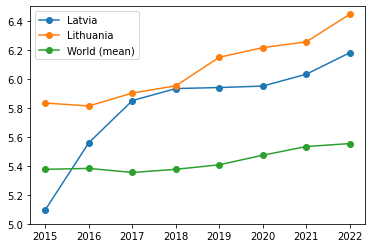

In [12]:
x = list(happiness.Year.unique())
y_Latvia = list(happiness.query('Country == "Latvia"').Score)
y_Lithuania = list(happiness.query('Country == "Lithuania"').Score)
y_mean = list(happiness.groupby('Year').aggregate('mean').Score)

plt.plot(x, y_Latvia, marker = 'o', markersize = 6, label='Latvia')
plt.plot(x, y_Lithuania, marker = 'o', markersize = 6, label='Lithuania')
plt.plot(x, y_mean, marker = 'o', markersize = 6, label='World (mean)')
plt.legend(loc = "upper left")
plt.ylim([5, 6.5]);

Now we test whether there is a significant difference between happiness scores of Latvia and Lithuania. For this, we use a t-test to compare group means.

In [13]:
la = happiness.query('Country == "Latvia"').Score
li = happiness.query('Country == "Lithuania"').Score
result = scipy.stats.ttest_ind(la, li)

print(f'The p-value of the t-test between mean happiness scores for Latvia and Lithuania is {round(result[1],3)} with summary statistic t= {round(result[0],3)}.')

The p-value of the t-test between mean happiness scores for Latvia and Lithuania is 0.103 with summary statistic t= -1.745.


**Interpretation:** The results of the t-test suggest that there is no significant difference between the mean happiness scores of Latvia and Lithuania for the years 2015-2022 (*t*= -1.745, *p*=0.103).

As we can see with the help of the plot, Latvia’s happiness score was lower than the mean score of all countries in 2015. What is interesting though, is the fact that Latvia’s score was significantly higher after that, so much so that it nearly reached Lithuania’s score in 2017 and in 2018.  One reason for Latvia’s score in 2015 could be the massive emigration flow, depriving the economy of qualified resources. In 2016 the country remains a consolidated democracy and Latvia’s economic development has been more stable and positive. Latvia’s GDP grew by 2 percent in 2017 and the registered unemployment rate was only 7.9 percent. After this time Latvia’s score increased steadily but since Lithuania’s score also continued increasing, so Latvia’s has yet to catch up. 

#### 1.3 Palestine-Israel

We do the same for Palestine and Israel, again with a line plot indicating the countries' happiness scores as well as the world's mean happiness score for all years.

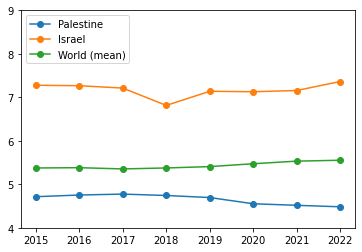

In [14]:
y_Palestine = list(happiness.query('Country == "West Bank and Gaza"').Score)
y_Israel = list(happiness.query('Country == "Israel"').Score)

plt.plot(x, y_Palestine, marker = 'o', markersize = 6, label='Palestine')
plt.plot(x, y_Israel, marker = 'o', markersize = 6, label='Israel')
plt.plot(x, y_mean, marker = 'o', markersize = 6, label='World (mean)')
plt.legend(loc = "upper left")
plt.ylim([4, 9]);

Now we test whether there is a significant difference between happiness scores of Palestine and Israel. For this, we use a t-test to compare group means.

In [15]:
p = happiness.query('Country == "West Bank and Gaza"').Score
i = happiness.query('Country == "Israel"').Score
result = scipy.stats.ttest_ind(p, i)

print(f'The p-value of the t-test between mean happiness scores for Palestine and Israel is {round(result[1],3)} with summary statistic t= {round(result[0],3)}.')

The p-value of the t-test between mean happiness scores for Palestine and Israel is 0.0 with summary statistic t= -35.174.


**Interpretation:** The results of the t-test suggest that there is a significant difference between the mean happiness scores of Palestine and Israel for the years 2015-2022 (*t*= -35.174, *p*<0.001).

Even though both countries share the same continental space, climate and a lot of similarities in health and nutrition habits, their happiness scores vary vastly from one another. While Isarael mostly holds a place in the top 15 happiest countries between 2015 and 2021, Palestine (or the Palestine Territories) constantly ranks between the 100th and 110th place. The scores of both countries seem steady, with Israel’s mean being 7.2 and Palestine’s mean being 4.7. One can explain this enormous difference with the fact that for years, Israel and Palestine have been in a conflict. Since the establishment of Israel as a modern state, the Palestinians have been opposed to their bordering country; bombing and military offense have been occuring from both sides. However, this war is happening mostly on Palestinian territory, so it affects more Palestinian people negatively. Israel’s military occupation has impacted every aspect of daily life for Palestinians: restricting movement, imposing discriminatory control, and threatening homes and livelihoods. Collective punishment and repeated military assault are occurring frequently in Gaza. Also, Israel's military occupation remains a major obstacle to the availability, accessibility and quality of healthcare for Palestinians. All in all, due to the history of the land itself, it is very clear why Palestine always has a score much lower than the mean of the world.

#### 1.4 Cambodia-Thailand

We have decided to also do a case study on Thailand and Cambodia since we noticed with the help of our worldmap that Cambodia’s scores were constantly lower than those of Thailand.

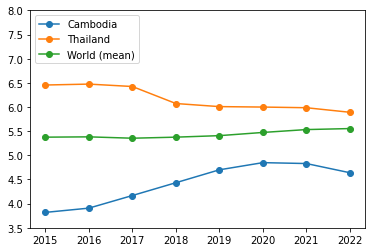

In [16]:
y_Cambodia = list(happiness.query('Country == "Cambodia"').Score)
y_Thailand = list(happiness.query('Country == "Thailand"').Score)

plt.plot(x, y_Cambodia, marker = 'o', markersize = 6, label='Cambodia')
plt.plot(x, y_Thailand, marker = 'o', markersize = 6, label='Thailand')
plt.plot(x, y_mean, marker = 'o', markersize = 6, label='World (mean)')
plt.legend(loc = "upper left")
plt.ylim([3.5, 8]);

Now we test whether there is a significant difference between happiness scores of Palestine and Israel. For this, we use a t-test to compare group means.

In [17]:
c = happiness.query('Country == "Cambodia"').Score
t = happiness.query('Country == "Thailand"').Score
result = scipy.stats.ttest_ind(c, t)

print(f'The p-value of the t-test between mean happiness scores for Cambodia and Thailand is {round(result[1],3)} with summary statistic t= {round(result[0],3)}.')

The p-value of the t-test between mean happiness scores for Cambodia and Thailand is 0.0 with summary statistic t= -10.386.


**Interpretation:** The results of the t-test suggest that there is a significant difference between the mean happiness scores of Palestine and Israel for the years 2015-2022 (*t*= -10.174, *p*<0.001).

One interpretation of Cambodia’s lower score could be the fact that corruption is a huge problem in Cambodia. Authorities systematically deny Cambodians their right to peaceful assembly by suppressing protests. Even though in 2021, Cambodia had more than 60 political prisoners for corruption behind bars and people were seeing some justice, more problems awaited the Cambodians. During the Covid-19 lockdowns the government could not ensure access to adequate food, medical, and other basic needs. The authorities also resorted to beating people on the streets in Phnom Penh with bamboo canes for not following the rules. 
As we can see from the later made plot, Cambodia has constantly a lower score than the mean of the world and Thailand has a higher score, even though Cambodia’s score mostly increases with time and Thailand’s decreases. Thailand’s decrease could be explained by the violent incidents between the Thai government and Barisan Revolusi Nasional (BRN). One could maybe foresee that both countries might have similar scores in the future. 

### (2) Covid effects on happiness scores <a class="anchor" id="2.2"></a>

For out third research question we wanted to analyze how different countries’ happiness scores changed between pre-covid and the COVID period. Since one data set contains data from three years, we compared 2021 (containing the data from: 2020; 2019; 2018) and 2022 (containing the data from: 2021; 2020; 2019). And since 2020 and 2019 were in both sets, they cancelled each other out, so at the end we could compare 2018 (pre-covid) and 2021 (COVID era).  

We now plot a heatmap of the happiness rankings onto the world map. This way we 
get a nice overview of the distribution of happiness as well as variances within and between continents.
We use geopandas for that, a library that provides an easy access to such a world map.

#### 2.1 Happiness scores 2021

We load and prepare the geopandas world map data for 2021.

In [18]:
# load world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[(world.pop_est>0) & (world.name!="Antarctica")] # leave out little to no population
world.reset_index(inplace=True, drop=True)
world.rename(columns={'name':'Country'}, inplace=True)

# rename necessary country names in happiness data to match world data
#print("in h21 but not in world: ", list(find_country_mismatch(happiness_2021, world)), "\n")
#print("in world but not in h21: ", list(find_country_mismatch(world, happiness_2021)))

happiness_2021.loc[list(happiness_2021['Country']).index('Czech Republic'),'Country'] = "Czechia"
happiness_2021.loc[list(happiness_2021['Country']).index('United States'),'Country'] = "United States of America"
happiness_2021.loc[list(happiness_2021['Country']).index('Taiwan Province of China'),'Country'] = "Taiwan"
happiness_2021.loc[list(happiness_2021['Country']).index('Bosnia and Herzegovina'),'Country'] = "Bosnia and Herz."
happiness_2021.loc[list(happiness_2021['Country']).index('Dominican Republic'),'Country'] = "Dominican Rep."
happiness_2021.loc[list(happiness_2021['Country']).index('Congo, Rep.'),'Country'] = "Congo"
happiness_2021.loc[list(happiness_2021['Country']).index('Ivory Coast'),'Country'] = "Côte d'Ivoire"
happiness_2021.loc[list(happiness_2021['Country']).index('West Bank and Gaza'),'Country'] = "Palestine"

We add the happiness scores of 2021 to the world data.

In [19]:
# add happiness scores to the geo data
world["happiness_score_2021"] = np.nan * len(world) # add column with NAs
for i in range(len(world)):
    if world.loc[i, 'Country'] in list(happiness_2021['Country']):
        world.loc[i, 'happiness_score_2021'] = happiness_2021.loc[list(happiness_2021['Country']).index(world.loc[i, 'Country']), 'Score']

Below we see the happiness scores for all countries that we have data for from the happiness report 2021.

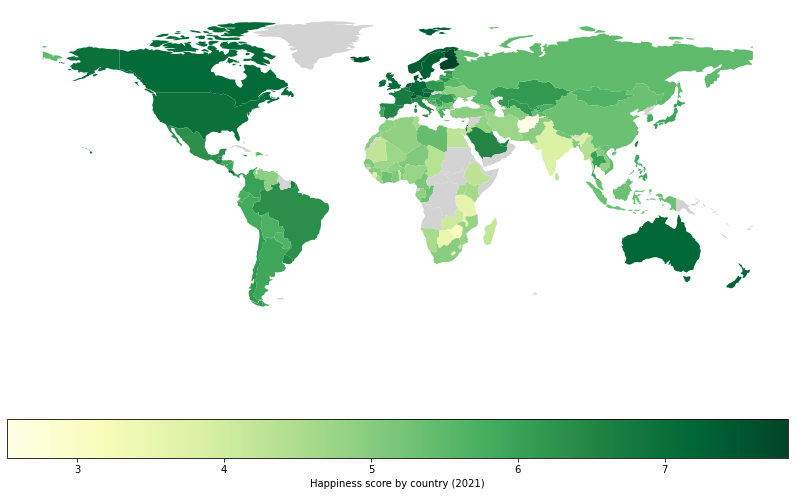

In [20]:
# initialize canvas and plot
fig, ax = plt.subplots(figsize=(14,12))

# plot map on axis
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
world.plot(column='happiness_score_2021', 
           ax=ax, cmap='YlGn', legend=True,
           legend_kwds={"label": "Happiness score by country (2021)", 
                        "orientation":"horizontal"},
           missing_kwds={"color": "lightgrey", 
                         "label": "NaN"})

plt.axis('off')
plt.show()

#### 2.2 Happiness scores 2022

We prepare the geopandas world map data for 2022.

In [21]:
# rename necessary country names in happiness data to match world data
#print("in h22 but not in world: ", list(find_country_mismatch(happiness_2022, world)), "\n")
#print("in world but not in h22: ", list(find_country_mismatch(world, happiness_2022)))

happiness_2022.loc[list(happiness_2022['Country']).index('United States'),'Country'] = "United States of America"
happiness_2022.loc[list(happiness_2022['Country']).index('Taiwan Province of China'),'Country'] = "Taiwan"
happiness_2022.loc[list(happiness_2022['Country']).index('Bosnia and Herzegovina'),'Country'] = "Bosnia and Herz."
happiness_2022.loc[list(happiness_2022['Country']).index('Dominican Republic'),'Country'] = "Dominican Rep."
happiness_2022.loc[list(happiness_2022['Country']).index('Ivory Coast'),'Country'] = "Côte d'Ivoire"

Now, we add the happiness scores for 2022 to the world data.

In [22]:
# add happiness scores to the geo data
world["happiness_score_2022"] = np.nan * len(world) # add column with NAs
for i in range(len(world)):
    if world.loc[i, 'Country'] in list(happiness_2022['Country']):
        world.loc[i, 'happiness_score_2022'] = happiness_2022.loc[list(happiness_2022['Country']).index(world.loc[i, 'Country']), 'Score']

Below we plot the happiness scores for all countries that we have data for from the happiness report 2022.

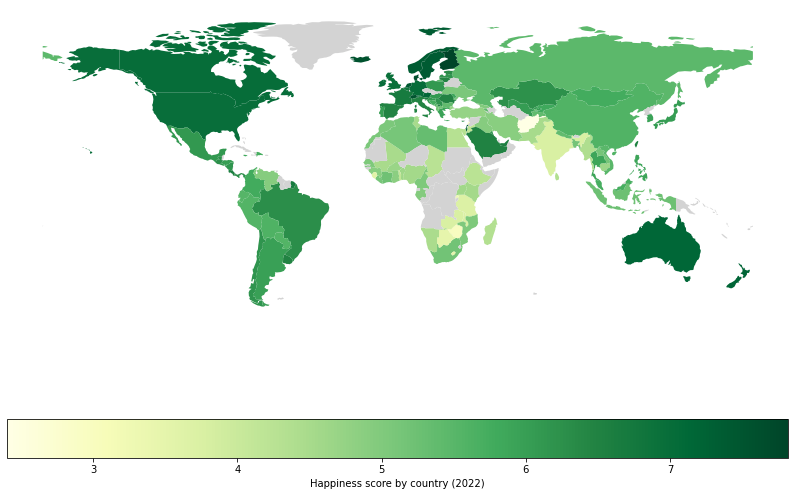

In [23]:
# initialize canvas and plot
fig, ax = plt.subplots(figsize=(14,12))

# plot map on axis
# https://geopandas.org/en/stable/docs/user_guide/mapping.html
world.plot(column='happiness_score_2022', 
           ax=ax, cmap='YlGn', legend=True,
           legend_kwds={"label": "Happiness score by country (2022)", 
                        "orientation":"horizontal"},
           missing_kwds={"color": "lightgrey", 
                         "label": "NaN"})

plt.axis('off')
plt.show()

#### 2.3 Summary statistics for world happiness 2021 and 2022

To investigate the differences between the most recent happiness scores for all countries, we here calculate and visualize summary statistics.

In [24]:
# calculate happiness differences between 2021 and 2022 data
summary_stats = world[['Country', 'happiness_score_2021', 'happiness_score_2022']]
summary_stats['difference'] = np.nan * len(summary_stats)

for i in range(len(world)):
    if (world.loc[i, 'happiness_score_2021'] == np.nan) or (world.loc[i, 'happiness_score_2022'] == np.nan):
        summary_stats.loc[i, 'difference'] = np.nan
    else:
        summary_stats.loc[i, 'difference'] = world.loc[i, 'happiness_score_2022'] - world.loc[i, 'happiness_score_2021']
        
# calculate summary statistics (mean, median, max diffs)
max_neg_diffs = summary_stats.sort_values('difference')
max_pos_diffs = summary_stats.sort_values('difference', ascending=False)
mean = summary_stats.agg({'difference': 'mean'})[0]
median = summary_stats.agg({'difference': 'median'})[0]

<ipython-input-24-9c196a9ce4e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Below we plot the distribution of happiness scores 2021 and 2022 as well as their difference.

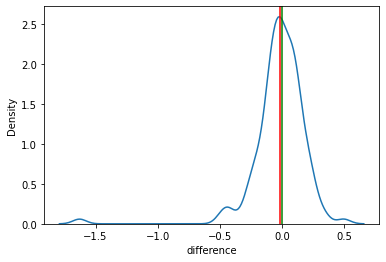

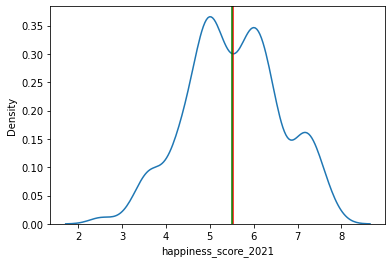

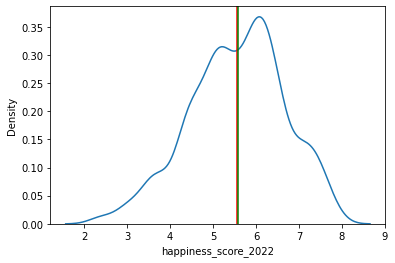

In [25]:
# Plot density plots
sns.kdeplot(summary_stats['difference'],bw_method=0.25)
plt.axvline(mean, 0, 2.6, color='red')
plt.axvline(median, 0, 2.6, color='green')
plt.show()

sns.kdeplot(summary_stats['happiness_score_2021'],bw_method=0.25) # add axes labels interval [0,10]
plt.axvline(summary_stats.agg({'happiness_score_2021': 'mean'})[0], 0, 2.6, color='red')
plt.axvline(summary_stats.agg({'happiness_score_2021': 'median'})[0], 0, 2.6, color='green')
plt.show()

sns.kdeplot(summary_stats['happiness_score_2022'],bw_method=0.25)
plt.axvline(summary_stats.agg({'happiness_score_2022': 'mean'})[0], 0, 2.6, color='red')
plt.axvline(summary_stats.agg({'happiness_score_2022': 'median'})[0], 0, 2.6, color='green')
plt.show()

With the help of both density plots, we saw that both data sets hat a bimodal distribution with the main difference that the COVID era data had more scores in quantity that were higher compared to the pre COVID era. Most of the countries taking part had a happiness score of 6.5 in the COVID period, while for the pre COVID period it was almost even distributed between 4.8 and 6.5 with slightly more countries having a score of 4.8.  

Now we test whether there is a significant difference between happiness scores of Palestine and Israel. For this, we use a t-test to compare group means.

In [26]:
h21 = happiness.query('Year == "2021"').Score
h22 = happiness.query('Year == "2022"').Score
result = scipy.stats.ttest_ind(h21, h22)

print(f'The p-value of a significant difference between mean happiness scores 2021 and 2022 is {round(result[1],3)} with summary statistic t= {round(result[0],3)}.')

The p-value of a significant difference between mean happiness scores 2021 and 2022 is 0.869 with summary statistic t= -0.165.


The t-test indicates a non-significant mean difference in happiness scores for all countries between 2021 and 2022. There still is a difference between both years.

To dive into the reasons for this shift, we looked closer to the countries that had a stable score between the years, the countries that had the highest and the lowest difference between their happiness scores throughout the years.

In [27]:
# Look for stable countries
#max_pos_diffs.head(60)
max_neg_diffs.head(65)

# stable from neg to pos: Egypt, Iceland, Chile (0), Cyprus, France
# max negative diff: Lebanon (outlier), Costa Rica, Jamaica, Benin, Pakistan
# max positive diff: Romania, Malaysia, Mozambique, China, Croatia

,Country,happiness_score_2021,happiness_score_2022,difference
77,Lebanon,4.584,2.955,-1.629
34,Costa Rica,7.069,6.582,-0.487
46,Jamaica,6.309,5.850,-0.459
54,Benin,5.045,4.623,-0.422
102,Pakistan,4.934,4.516,-0.418
...,...,...,...,...
132,Spain,6.491,6.476,-0.015
43,France,6.690,6.687,-0.003
160,Cyprus,6.223,6.221,-0.002
10,Chile,6.172,6.172,0.000


Egypt, Iceland, Chile, Cyprus and France had the most stable scores with almost no difference. Romania, Malaysia, Mozambique, China and Croatia and had slightly higher scores than the pre COVID period and Lebanon, Costa Rica, Jamaica, Benin and Pakistan all had negative difference of ~0.4 with the exception of Lebanon, which was an outlier with a score - 1.6.  
In Lebanon, health-care workers have suffered pay cuts, deficiencies in equipment supplies, and unemployment. Patients are often unable to afford medical services impacted by the economic crisis. More than 40% of the Lebanese population is living below the poverty line. Accounting The Beirut Port explosion on 4 August 2020, it is also understandable why the happiness score sunk so drastically, since this tragic event affected many people negatively. The economic crisis in Lebanon led to a further fall of the GDP in Lebanon, which would be another factor. 
 
No evidence was found as to why Romania etc had higher scores in the COVID period.

### (3) Country priorities over time <a class="anchor" id="2.3"></a>

In our third research question we investigate how the priorities affecting the happiness scores of the countries change over time.

#### 3.1 Data preparation

First of all, we sort the happiness data alphabetically and remove zero-valued rows of missing data.

In [28]:
#sort alphabetically by country then year
happiness_alphabetically = happiness.sort_values(['Country','Year'])
#adjust index to reflect new order to get easier access to infro from previous years
happiness_alphabetically=happiness_alphabetically.reset_index(drop=True)

for indices, row in happiness_alphabetically.iterrows():
    for column in happiness_alphabetically.columns:
        if(happiness_alphabetically.at[indices,column]== 0.000000 and (happiness_alphabetically.at[indices,'Year'] != 2015 or 2022)):

            #check if previous and next entry for that contain zeroes and are still the same country
            if((not(is_zero(happiness_alphabetically.at[indices,'Country'], (int(happiness_alphabetically.at[indices,'Year'])-1), column))) 
            & (happiness_alphabetically.at[indices-1,'Country'] == happiness_alphabetically.at[indices,'Country']) 
            & (not(is_zero(happiness_alphabetically.at[indices,'Country'], (int(happiness_alphabetically.at[indices,'Year'])+1), column)))
            & (happiness_alphabetically.at[indices+1,'Country'] == happiness_alphabetically.at[indices,'Country'])):

              #calculate mean of previous and next entry to replace current zero
              happiness_alphabetically.at[indices,column]= statistics.fmean([happiness_alphabetically.at[indices-1,column],happiness_alphabetically.at[indices+1,column]])

            else:
                break

#sort by Rank and Year again
happiness_goback = happiness_alphabetically.sort_values(['Year', 'Rank'])
#readjust index
happiness = happiness_goback.reset_index(drop=True)

#check to see if it worked
#happiness[happiness.eq(0.000000).any(1)]

We now extract the 10 happiest and 10 unhappiest countries for each year.

In [29]:
# drop all rows with at least 1 Zero
happiness.loc[~(happiness==0).any(axis=1)]

# bottom 10
happiness_bottom10 = pd.concat([happiness.loc[happiness['Year'] == '2015'][-10:], happiness.loc[happiness['Year'] == '2016'][-10:], 
                                happiness.loc[happiness['Year'] == '2017'][-10:], happiness.loc[happiness['Year'] == '2018'][-10:], 
                                happiness.loc[happiness['Year'] == '2019'][-10:], happiness.loc[happiness['Year'] == '2020'][-10:], 
                                happiness.loc[happiness['Year'] == '2021'][-10:], happiness.loc[happiness['Year'] == '2022'][-10:]])

# top 10
happiness_top10 = pd.concat([happiness.loc[happiness['Year'] == '2015'][:10], happiness.loc[happiness['Year'] == '2016'][:10], 
                                happiness.loc[happiness['Year'] == '2017'][:10], happiness.loc[happiness['Year'] == '2018'][:10], 
                                happiness.loc[happiness['Year'] == '2019'][:10], happiness.loc[happiness['Year'] == '2020'][:10], 
                                happiness.loc[happiness['Year'] == '2021'][:10], happiness.loc[happiness['Year'] == '2022'][:10]])

# Example top 10 from 2022
happiness_top10[happiness_top10["Year"] == "2022"]

,Country,Region,Rank,Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,iso_alpha
1084,Finland,NaN,1,7.821,NaN,1.892,1.258,0.775,0.736,0.534,0.109,2.518,2022,FIN
1085,Denmark,NaN,2,7.636,NaN,1.953,1.243,0.777,0.719,0.532,0.188,2.226,2022,DNK
1086,Iceland,NaN,3,7.557,NaN,1.936,1.320,0.803,0.718,0.191,0.270,2.320,2022,ISL
1087,Switzerland,NaN,4,7.512,NaN,2.026,1.226,0.822,0.677,0.461,0.147,2.153,2022,CHE
1088,Netherlands,NaN,5,7.415,NaN,1.945,1.206,0.787,0.651,0.419,0.271,2.137,2022,NLD
1089,Luxembourg*,NaN,6,7.404,NaN,2.209,1.155,0.790,0.700,0.388,0.120,2.042,2022,NaN
1090,Sweden,NaN,7,7.384,NaN,1.920,1.204,0.803,0.724,0.512,0.218,2.003,2022,SWE
1091,Norway,NaN,8,7.365,NaN,1.997,1.239,0.786,0.728,0.474,0.217,1.925,2022,NOR
1092,Israel,NaN,9,7.364,NaN,1.826,1.221,0.818,0.568,0.143,0.155,2.634,2022,ISR
1093,New Zealand,NaN,10,7.200,NaN,1.852,1.235,0.752,0.680,0.483,0.245,1.954,2022,NZL


In [30]:
# Check relevant predictor data types
print(type(happiness_top10["GDP"][1]))
print(type(happiness_top10["Family"][1]))
print(type(happiness_top10["Health"][1]))
print(type(happiness_top10["Freedom"][1]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


#### 3.2 Plotting

For each predictor we plot boxplots of the happiest and unhappiest countries respectively.

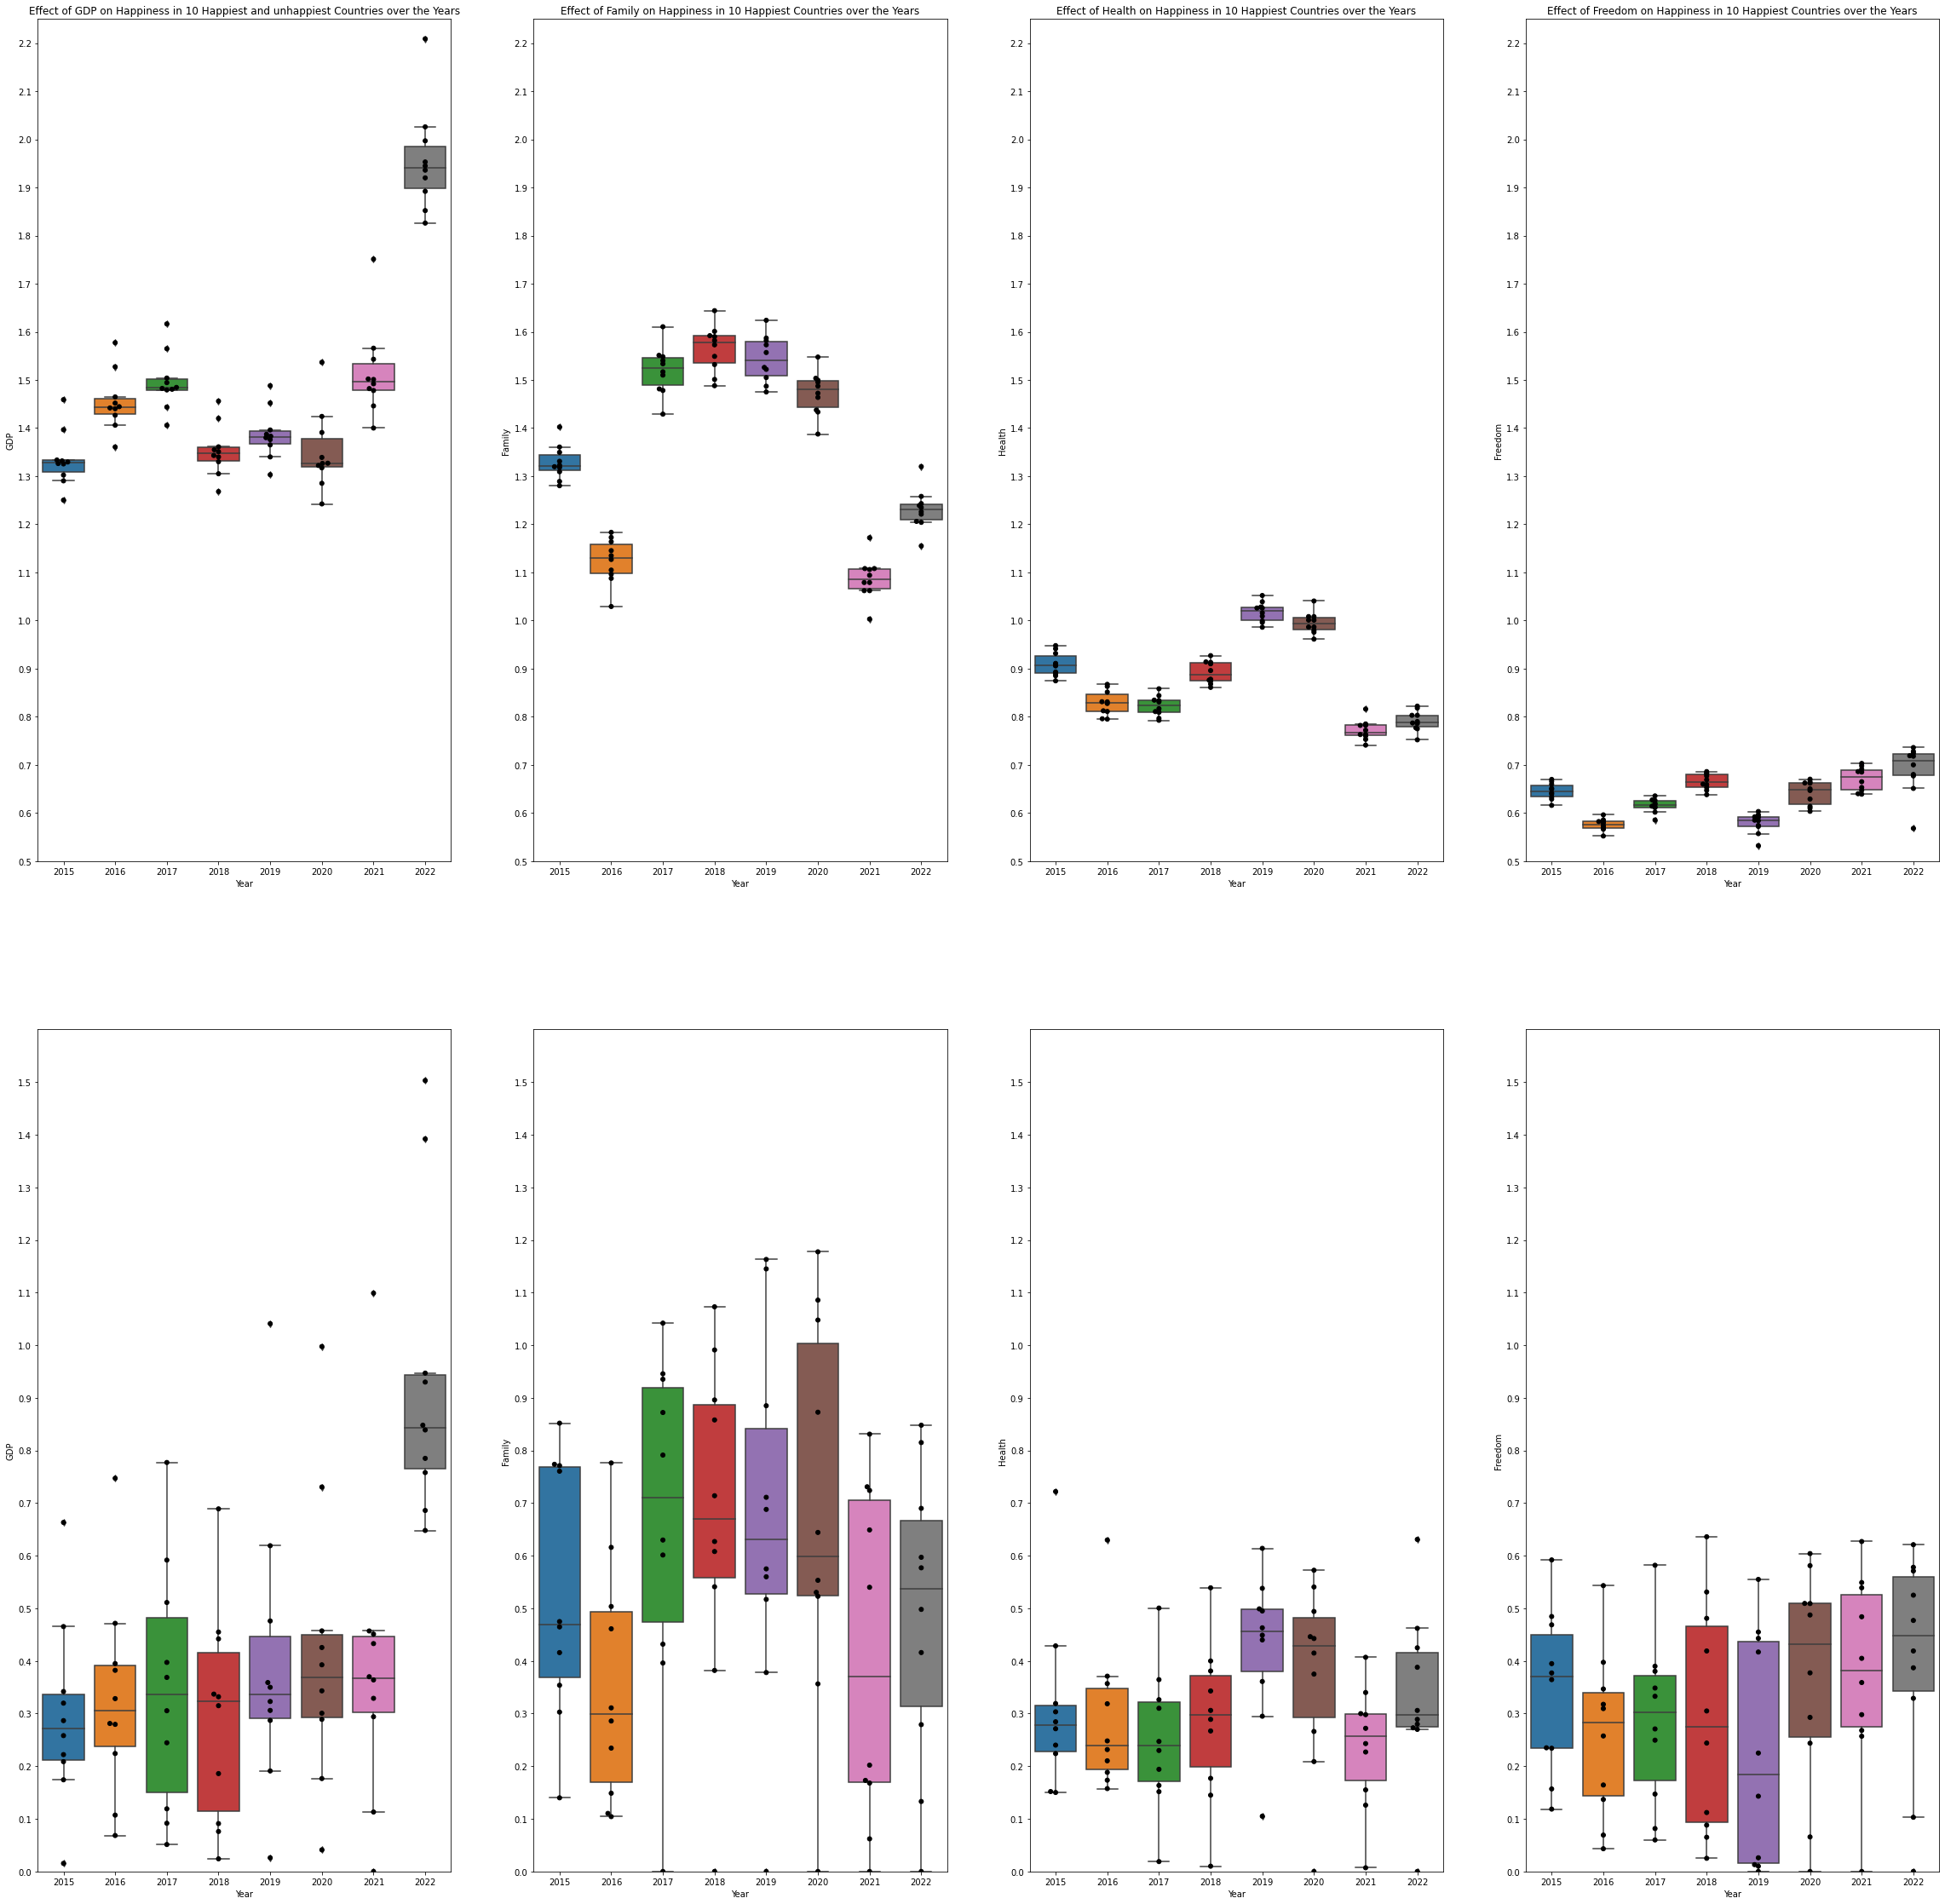

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(40,40))

# GDP 
sns.boxplot(data=happiness_top10, y = "GDP", x = "Year", ax= axes[0,0])
sns.swarmplot(data = happiness_top10, x='Year', y="GDP", linewidth=1, color='black', ax= axes[0,0])
sns.boxplot(data=happiness_bottom10, y = "GDP", x = "Year", ax= axes[1,0])
sns.swarmplot(data = happiness_bottom10, x='Year', y="GDP", linewidth=1, color='black', ax= axes[1,0])
axes[0,0].set(title="Effect of GDP on Happiness in 10 Happiest and unhappiest Countries over the Years", ylim=(0.5,2.25),yticks=np.arange(0.5,2.25, 0.1))
axes[1,0].set(ylim=(0,1.6),yticks=np.arange(0,1.6, 0.1))

# Familiy
sns.boxplot(data=happiness_top10, y = "Family", x = "Year", ax= axes[0,1])
sns.swarmplot(data = happiness_top10, x='Year', y="Family", linewidth=1, color='black', ax= axes[0,1])
sns.boxplot(data=happiness_bottom10, y = "Family", x = "Year", ax= axes[1,1])
sns.swarmplot(data = happiness_bottom10, x='Year', y="Family", linewidth=1, color='black', ax= axes[1,1])
axes[0,1].set(title="Effect of Family on Happiness in 10 Happiest Countries over the Years", ylim=(0.5,2.25),yticks=np.arange(0.5,2.25, 0.1))
axes[1,1].set(ylim=(0,1.6),yticks=np.arange(0,1.6, 0.1))

# Health
sns.boxplot(data=happiness_top10, y = "Health", x = "Year", ax= axes[0,2])
sns.swarmplot(data = happiness_top10, x='Year', y="Health", linewidth=1, color='black', ax= axes[0,2])
sns.boxplot(data=happiness_bottom10, y = "Health", x = "Year", ax= axes[1,2])
sns.swarmplot(data = happiness_bottom10, x='Year', y="Health", linewidth=1, color='black', ax= axes[1,2])
axes[0,2].set(title="Effect of Health on Happiness in 10 Happiest Countries over the Years", ylim=(0.5,2.25),yticks=np.arange(0.5,2.25, 0.1))
axes[1,2].set(ylim=(0,1.6),yticks=np.arange(0,1.6, 0.1))

# Freedom
sns.boxplot(data=happiness_top10, y = "Freedom", x = "Year", ax= axes[0,3])
sns.swarmplot(data = happiness_top10, x='Year', y="Freedom", linewidth=1, color='black', ax= axes[0,3])
sns.boxplot(data=happiness_bottom10, y = "Freedom", x = "Year", ax= axes[1,3])
sns.swarmplot(data = happiness_bottom10, x='Year', y="Freedom", linewidth=1, color='black', ax= axes[1,3])
axes[0,3].set(title="Effect of Freedom on Happiness in 10 Happiest Countries over the Years", ylim=(0.5,2.25),yticks=np.arange(0.5,2.25, 0.1))
axes[1,3].set(ylim=(0,1.6),yticks=np.arange(0,1.6, 0.1));

In these plots, we can see how each predictor affect the happiness score in the happiest and unhappiest 10 countries across the years. First row shows the happiest countries and the second row shows the unhappiest countries. In the unhappiest countries the box plots are taller, indicating that the predictors contribute the happiness in varying degrees. These countries have different priorities for their happiness. On the other hand, the box plots for the happiest countries are shorter, indicating that the factors for the happiness are close to each other. Please note that the y-axis limits are different in the rows for a better visualization for each row. 

Line plots can give us an overview of how the priorities fluctuate over the years for the happiest countries in the world.

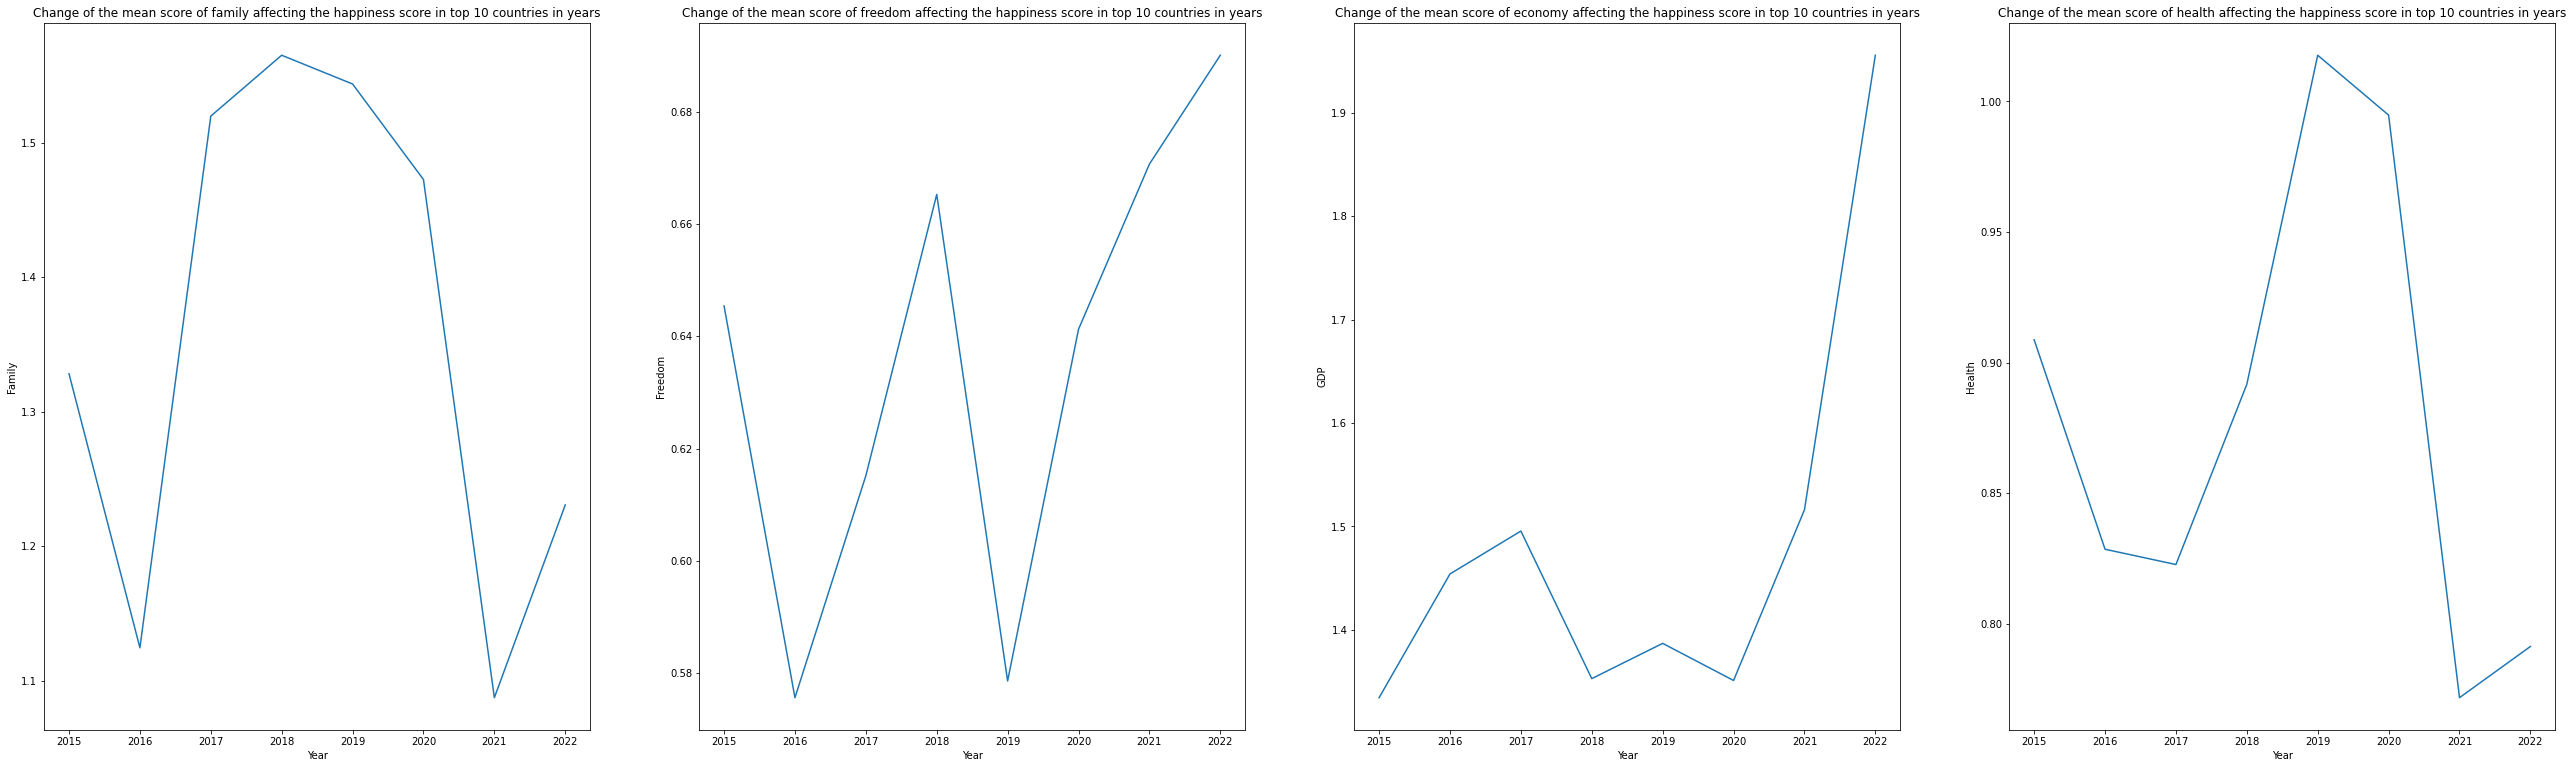

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(45,13))

# Family
family_top10 = happiness_top10.loc[:, ["Family", "Year"]].groupby("Year").mean()
sns.lineplot(data=family_top10, x = "Year", y = "Family", ax= axes[0])
axes[0].set(title="Change of the mean score of family affecting the happiness score in top 10 countries in years")

# Freedom
freedom_top10 = happiness_top10.loc[:, ["Freedom", "Year"]].groupby("Year").mean()
sns.lineplot(data=freedom_top10, x = "Year", y = "Freedom", ax = axes[1])
axes[1].set(title="Change of the mean score of freedom affecting the happiness score in top 10 countries in years")

# GDP
gdp_top10 = happiness_top10.loc[:, ["GDP", "Year"]].groupby("Year").mean()
sns.lineplot(data=gdp_top10, x = "Year", y = "GDP", ax = axes[2])
axes[2].set(title="Change of the mean score of economy affecting the happiness score in top 10 countries in years")

# Health
health_top10 = happiness_top10.loc[:, ["Health", "Year"]].groupby("Year").mean()
sns.lineplot(data=health_top10, x = "Year", y = "Health", ax = axes[3])
axes[3].set(title="Change of the mean score of health affecting the happiness score in top 10 countries in years");

The line plots across years to show the factors for the happiness in the happiest countries in each year. The family has more importance in 2017, 2018, 2019, and 2020 compared to the rest of the time. Freedom is low on the priorities in each year. Economy (GDP) increases for 2022. Finally, health is given more importance than freedom but still not as much as the family and the economy. From the first look, we can interpret that the economy and family have more value in happiness in the world's happiest countries. Please note that the y-axis limits are different from the plots of the unhappiest countries and from each other. 

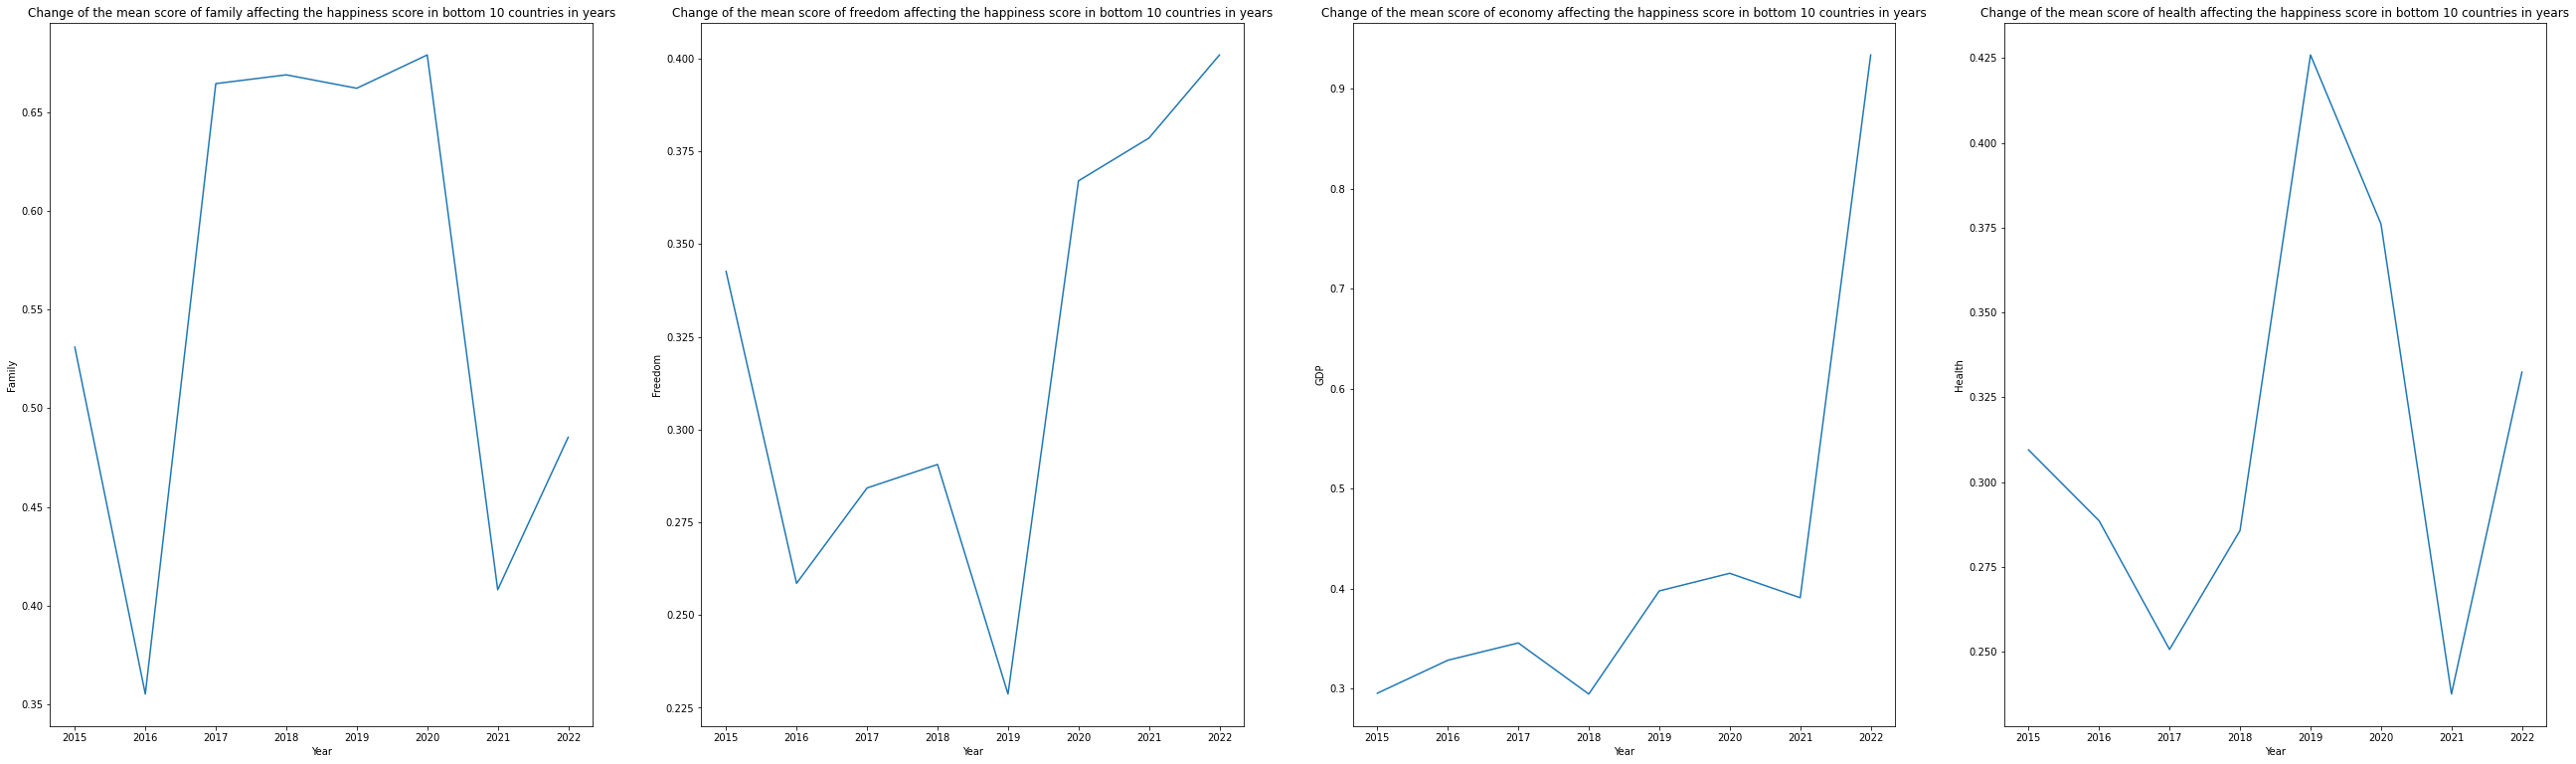

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(45,13))

# Family
family_bottom10 = happiness_bottom10.loc[:, ["Family", "Year"]].groupby("Year").mean()
sns.lineplot(data=family_bottom10, x = "Year", y = "Family", ax= axes[0])
axes[0].set(title="Change of the mean score of family affecting the happiness score in bottom 10 countries in years")


# Freedom
freedom_bottom10 = happiness_bottom10.loc[:, ["Freedom", "Year"]].groupby("Year").mean()
sns.lineplot(data=freedom_bottom10, x = "Year", y = "Freedom", ax = axes[1])
axes[1].set(title="Change of the mean score of freedom affecting the happiness score in bottom 10 countries in years")

# GDP
gdp_bottom10 = happiness_bottom10.loc[:, ["GDP", "Year"]].groupby("Year").mean()
sns.lineplot(data=gdp_bottom10, x = "Year", y = "GDP", ax = axes[2])
axes[2].set(title="Change of the mean score of economy affecting the happiness score in bottom 10 countries in years")


# Health
health_bottom10 = happiness_bottom10.loc[:, ["Health", "Year"]].groupby("Year").mean()
sns.lineplot(data=health_bottom10, x = "Year", y = "Health", ax = axes[3])
axes[3].set(title="Change of the mean score of health affecting the happiness score in bottom 10 countries in years");


The line plots across years to show the factors for the happiness in the unhappiest countries in each year. These plots show similar trends to the plots for the happiest countries. The family gains importance in 2017 until 2020.The freedom is lower compared to the other factors, gaining some priorty from 2020 and on. The economy shows a large increase for 2022. Finally, health is again comparable to the freedom, however, with an increase in 2019. Please note that the y-axis limits are different from the plots of the happiest countries and from each other. 

Now we plot correlation matrices for top 10 and bottom 10 countries predictors. The solution was found here:  
https://kanokidotorg.github.io/2022/01/17/matplotlib-heatmap-for-correlation-matrix-using-dataframe/

In [34]:
# Calculate and plot correlation matrix for top 10
happiness_top10_num = happiness_top10[['Score', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
corr_top10 = happiness_top10_num.corr(method='pearson')
corr_top10

,Score,GDP,Family,Health,Freedom,Trust,Generosity
Score,1.000000,0.063018,0.107700,-0.025324,0.314729,0.155725,-0.379347
GDP,0.063018,1.000000,-0.408366,-0.545308,0.387829,0.176318,-0.438275
Family,0.107700,-0.408366,1.000000,0.640147,-0.085971,-0.247593,0.116383
Health,-0.025324,-0.545308,0.640147,1.000000,-0.359042,-0.198910,0.056450
Freedom,0.314729,0.387829,-0.085971,-0.359042,1.000000,0.375568,-0.429662
Trust,0.155725,0.176318,-0.247593,-0.198910,0.375568,1.000000,-0.394430
Generosity,-0.379347,-0.438275,0.116383,0.056450,-0.429662,-0.394430,1.000000


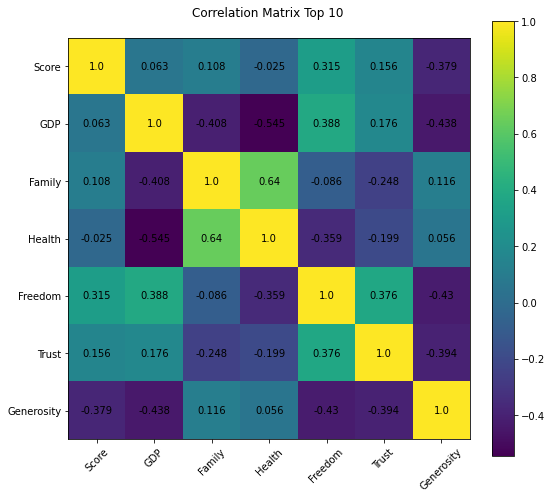

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(corr_top10, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05);

# Show all ticks and label them with the dataframe column name
ax.set_xticks(range(len(happiness_top10_num.columns)))
ax.set_xticklabels(happiness_top10_num.columns, rotation=45, fontsize=10)
ax.set_yticks(range(len(happiness_top10_num.columns)))
ax.set_yticklabels(happiness_top10_num.columns, rotation=0, fontsize=10)

# Loop over data dimensions and create text annotations
for i in range(len(happiness_top10_num.columns)):
    for j in range(len(happiness_top10_num.columns)):
        text = ax.text(j, i, round(corr_top10.to_numpy()[i, j], 3),
                       ha="center", va="center", color="black")

plt.title('Correlation Matrix Top 10 \n', fontsize=12)
plt.show()

In [36]:
happiness_bottom10_num = happiness_bottom10[['Score', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']]
corr_bottom10 = happiness_bottom10_num.corr(method='pearson')
corr_bottom10

,Score,GDP,Family,Health,Freedom,Trust,Generosity
Score,1.000000,0.062981,0.322439,0.093490,0.480609,0.173278,0.144825
GDP,0.062981,1.000000,0.248345,0.442671,0.174166,0.010882,-0.256151
Family,0.322439,0.248345,1.000000,0.283161,0.248785,0.035058,-0.270779
Health,0.093490,0.442671,0.283161,1.000000,0.168657,0.391542,0.193257
Freedom,0.480609,0.174166,0.248785,0.168657,1.000000,0.534762,-0.204661
Trust,0.173278,0.010882,0.035058,0.391542,0.534762,1.000000,0.167479
Generosity,0.144825,-0.256151,-0.270779,0.193257,-0.204661,0.167479,1.000000


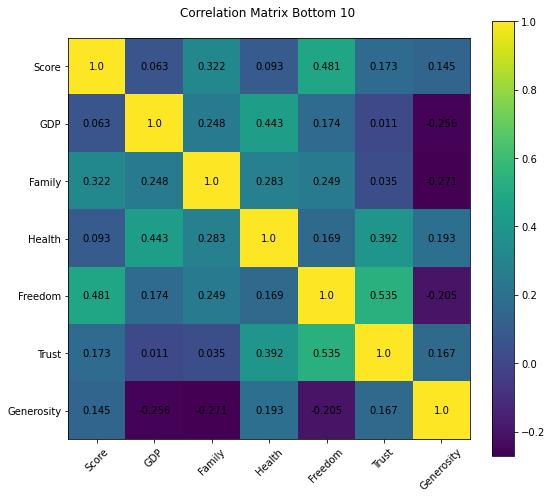

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(corr_bottom10, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05);

# Show all ticks and label them with the dataframe column name
ax.set_xticks(range(len(happiness_bottom10_num.columns)))
ax.set_xticklabels(happiness_bottom10_num.columns, rotation=45, fontsize=10)
ax.set_yticks(range(len(happiness_bottom10_num.columns)))
ax.set_yticklabels(happiness_bottom10_num.columns, rotation=0, fontsize=10)

# Loop over data dimensions and create text annotations
for i in range(len(happiness_bottom10_num.columns)):
    for j in range(len(happiness_bottom10_num.columns)):
        text = ax.text(j, i, round(corr_bottom10.to_numpy()[i, j], 3),
                       ha="center", va="center", color="black")

plt.title('Correlation Matrix Bottom 10 \n', fontsize=12)
plt.show()

#### 3.3 Statistical testing

Research Question:
What is the effect of each predictor on happiness over the years?

In [38]:
x = happiness_top10[["Freedom", "Family", "GDP", "Health"]]
y = happiness_top10["Score"]
x = sm.add_constant(x)

model = sm.OLS(y.astype(float), x.astype(float)).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.496
Date:                Tue, 28 Feb 2023   Prob (F-statistic):             0.0499
Time:                        12:29:47   Log-Likelihood:                 49.017
No. Observations:                  80   AIC:                            -88.03
Df Residuals:                      75   BIC:                            -76.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6786      0.360     18.558      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The results of the linear regression model suggest that especially Freedom is a significant predictor of happiness in the world (*t*= 2.693, *p*<0.009).
The constant term is the intercept of the regression line (6.68). The constant omits low-impact independent variables by giving us the average value of these variables (~noise). The rest of the coefficients show us that the rate of change for each predictor on happiness is rather small, with an almost neglectable negative change of GDP on happiness which is most likely caused by erroneous data.

In [39]:
# Code for the unhapiest countries - Implement after cleaning the zeroes.
x = happiness_bottom10[["Freedom", "Family", "GDP", "Health"]]
y = happiness_bottom10["Score"]
x = sm.add_constant(x)

model = sm.OLS(y.astype(float), x.astype(float)).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.281
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.21e-05
Time:                        12:29:47   Log-Likelihood:                -5.3808
No. Observations:                  80   AIC:                             20.76
Df Residuals:                      75   BIC:                             32.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0481      0.085     35.993      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The results of the linear regression model suggest that none of the factors is a significant predictor of happiness in the world. The constant term is the intercept of the regression line (3.04). The constant omits low-impact independent variables by giving us the average value of these variables (~noise).

### (4) Varying happiness in top and bottom ten countries <a class="anchor" id="2.4"></a>

We want to test the null hypothesis that the variance in the happiness score of the happiest and unhappiest 10 countries across all years do not differ significantely. To test this, we use the F-test.

First we turn the string values for 'Year' into numbers, so we can use them to distinguish between the different years.

In [40]:
# turn 'Year' values to int
happiness_top10["Year"] = pd.to_numeric(happiness_top10["Year"])
happiness_bottom10["Year"] = pd.to_numeric(happiness_bottom10["Year"])

Then we create a boxplot and a swarmplot for each of the top 10 happiest and unhappiest countries of every year.

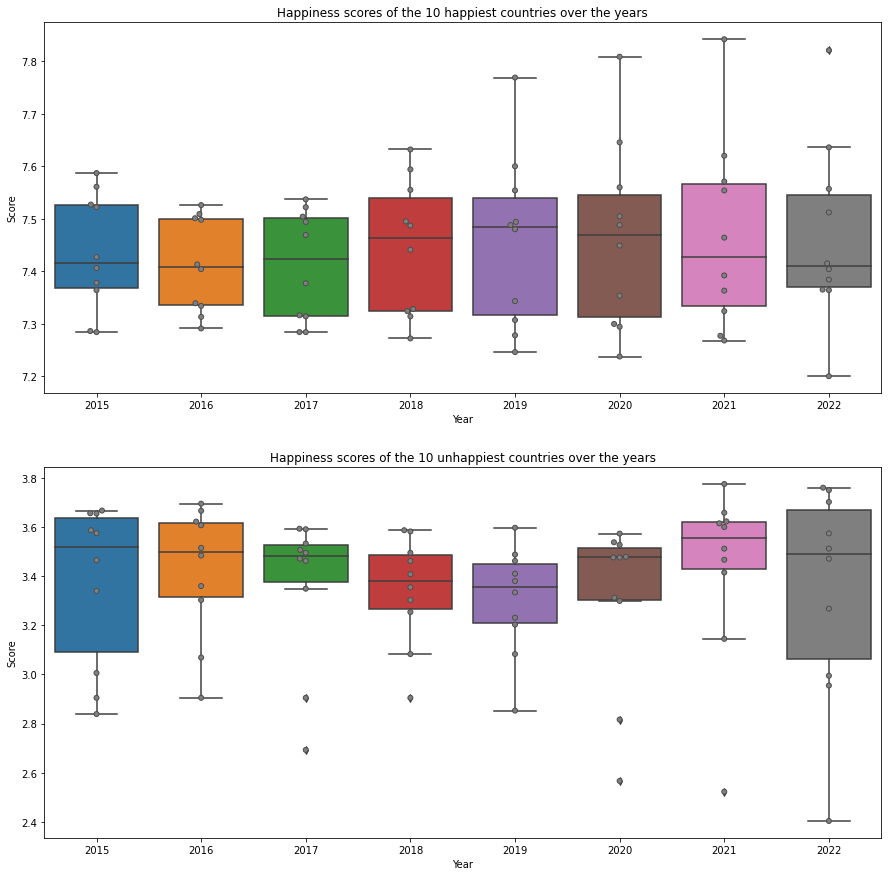

In [41]:
#fig = plt.subplots(figsize=(15,15), sharey = True)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
yticks = np.arange(2.5, 7.8, 0.25)

# plot top10
sns.boxplot(data = happiness_top10, x = "Year", y = "Score", ax=axes[0])
sns.swarmplot(linewidth = 1, color='grey', data = happiness_top10, x = "Year", y = "Score", ax=axes[0])
axes[0].set(title="Happiness scores of the 10 happiest countries over the years")

# plot bottom10
sns.boxplot(data = happiness_bottom10, x = "Year", y = "Score", ax=axes[1])
sns.swarmplot(linewidth = 1, color = 'grey', data = happiness_bottom10, x = "Year", y = "Score", ax=axes[1])
axes[1].set(title="Happiness scores of the 10 unhappiest countries over the years");

In [42]:
# maximum, minimum and mean of happiness score value of the top 10 countries across all years
print('The maximum happiness score value of the top 10 countries across all years is: ' + str(max(happiness_top10['Score'])))
print('The minimum happiness score value of the top 10 countries across all years is: ' + str(min(happiness_top10['Score'])))
print('The mean happiness score of the top 10 countries across all years is: ' + str((happiness_top10['Score'].mean())))
print('\n')
# maximum, minimum and mean of happiness score value of the bottom 10 countries across all years
print('The maximum happiness score value of the bottom 10 countries across all years is: ' + str(max(happiness_bottom10['Score'])))
print('The minimum happiness score value of the bottom 10 countries across all years is: ' + str(min(happiness_bottom10['Score'])))
print('The mean happiness score of the bottom 10 countries across all years is: ' + str((happiness_bottom10['Score'].mean())))

The maximum happiness score value of the top 10 countries across all years is: 7.842
The minimum happiness score value of the top 10 countries across all years is: 7.2
The mean happiness score of the top 10 countries across all years is: 7.444317497064418


The maximum happiness score value of the bottom 10 countries across all years is: 3.775
The minimum happiness score value of the bottom 10 countries across all years is: 2.404
The mean happiness score of the bottom 10 countries across all years is: 3.359796248333666


Plot:  
Across all years the maximum value of the happiest 10 countries is 7.842 and the minimum is 7.2.
The maximum for the 10 unhappiest countries is 4.112 and the minimum is 2.817. The difference between the maximum and the minimum value is bigger for the unhappiest countries.

In the plot, we can see that the 4 sections of the boxplots are always quite uneven.
For both the top 10 and the bottom 10 we can see that from 2019 onwards, the upper whisker is much longer than in the years prior. So more of the scores are above the median.

_______________________________________________________________________

We take a look at the variance of the countries in our top 10 data frame.

In [43]:
statistics.variance(happiness_top10['Score'])

0.019726740196588356

Then we loo at the bottom 10.

In [44]:
statistics.variance(happiness_bottom10['Score'])

0.09416671668563302

We calculate the variance of the top 10 happiest countries for every year.

In [45]:
#Variance of 10 happiest countries for each year
print('Variance of 10 happiest Countries in 2015: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2015]['Score'])))
print('Variance of 10 happiest Countries in 2016: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2016]['Score'])))
print('Variance of 10 happiest Countries in 2017: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2017]['Score'])))
print('Variance of 10 happiest Countries in 2018: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2018]['Score'])))
print('Variance of 10 happiest Countries in 2019: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2019]['Score'])))
print('Variance of 10 happiest Countries in 2020: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2020]['Score'])))
print('Variance of 10 happiest Countries in 2021: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2021]['Score'])))
print('Variance of 10 happiest Countries in 2022: ' + str(statistics.variance(happiness_top10.loc[happiness_top10['Year']==2022]['Score'])))

#array variances every year top
Top = [statistics.variance(happiness_top10.loc[happiness_top10['Year']==2015]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2016]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2017]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2018]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2019]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2020]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2021]['Score']), 
       statistics.variance(happiness_top10.loc[happiness_top10['Year']==2022]['Score'])]

Variance of 10 happiest Countries in 2015: 0.012133733333333353
Variance of 10 happiest Countries in 2016: 0.008181733333333342
Variance of 10 happiest Countries in 2017: 0.010993216513927264
Variance of 10 happiest Countries in 2018: 0.01655151111111109
Variance of 10 happiest Countries in 2019: 0.02690076666666666
Variance of 10 happiest Countries in 2020: 0.031423274062373434
Variance of 10 happiest Countries in 2021: 0.03277961111111108
Variance of 10 happiest Countries in 2022: 0.02998351111111108


And then the do the same for the bottom 10.

In [46]:
print('Variance of 10 unhappiest Countries in 2015: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2015]['Score'])))
print('Variance of 10 unhappiest Countries in 2016: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2016]['Score'])))
print('Variance of 10 unhappiest Countries in 2017: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2017]['Score'])))
print('Variance of 10 unhappiest Countries in 2018: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2018]['Score'])))
print('Variance of 10 unhappiest Countries in 2019: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2019]['Score'])))
print('Variance of 10 unhappiest Countries in 2020: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2020]['Score'])))
print('Variance of 10 unhappiest Countries in 2021: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2021]['Score'])))
print('Variance of 10 unhappiest Countries in 2022: ' + str(statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2022]['Score'])))

#array variances for every year bottom
Bottom =[statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2015]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2016]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2017]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2018]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2019]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2020]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2021]['Score']),
         statistics.variance(happiness_bottom10.loc[happiness_bottom10['Year']==2022]['Score'])]

Variance of 10 unhappiest Countries in 2015: 0.10899427777777783
Variance of 10 unhappiest Countries in 2016: 0.07007582222222225
Variance of 10 unhappiest Countries in 2017: 0.09468586165742321
Variance of 10 unhappiest Countries in 2018: 0.04747271111111113
Variance of 10 unhappiest Countries in 2019: 0.04781698888888887
Variance of 10 unhappiest Countries in 2020: 0.11643160989765912
Variance of 10 unhappiest Countries in 2021: 0.13149623333333332
Variance of 10 unhappiest Countries in 2022: 0.19172965555555552


Then we create a function for an F-test and use it to compare the variances in the top 10 happiest and unhappiest countries.

Code for F-test was found here:
https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/


In [47]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
f_test(happiness_top10['Score'], happiness_bottom10['Score'])

(0.20948739523800405, 0.9999999999813751)

Interpretation:  
The F-test statistic is 0.2837495450520097 and the p-value is 0.9999999687146132, therefore we can not reject the null hypothesis. This means, that the population variances are not significantly different from each other.